<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/new_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get update -qqq && apt-get dist-upgrade -qqq -y

In [0]:
# https://github.com/googlecolab/colabtools/issues/85#issuecomment-372532728
!apt-get install libproj-dev proj-data proj-bin -qqq -y
!apt-get install libgeos-dev -qqq -y
!pip install -q -U cython
!pip install -q -U cartopy
!pip install -q -U geopandas
!pip install -q -U geoplot

In [0]:
# https://gadm.org/about.html
!wget -q "https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip"
!unzip -qq -u gadm36_BRA_shp.zip

In [0]:
import geopandas as gpd
import geoplot as gplt

br = gpd.read_file('gadm36_BRA_1.shp')

In [4]:
import pandas as pd

# pca_vals = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/pca_values_08-19.csv?token=AJW2VYKF6JXIF7CPJPIX4YC5X3H4E")

pca_vals = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/pc1_2019.csv?token=AJW2VYLHX2G6H76T3YWGEQ25X5MEW")
pca_vals.head(1)

,Unnamed: 0,id,0,1,2,lon,lat
0,0,82098,-0.519376,2.422612,0.173939,-51.116667,-0.05


In [6]:
import numpy as np
(np.min(pca_vals["0"].to_numpy()[:]), np.max(pca_vals["0"].to_numpy()[:]))

(-3.4831080515443564, 4.534872295930258)

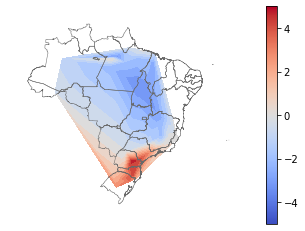

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

lons = pca_vals["lon"].to_numpy()[:]
lats = pca_vals["lat"].to_numpy()[:]
data = pca_vals["0"].to_numpy()[:] # 0th princomp

fig_pc = plt.figure()

ax = plt.axes(projection=ccrs.Miller())

lb = -5; ub = 5; lv = 20 # lower bound, upper bound, levels

plt.tricontourf(lons, lats, data, np.linspace(lb, ub, lv),
                cmap="coolwarm", extend="both")

gplt.polyplot(br, edgecolor="dimgray", linewidth=0.5, zorder=1, ax=ax)

plt.colorbar(ScalarMappable(norm=Normalize(lb, ub), cmap="coolwarm"), ax=ax)

plt.show()

fig_pc.savefig("pca_princomp1_20190819.png", dpi=300)

In [0]:
metadata = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115089&authkey=AN3WuZnSKh9jgC8")
temp_aug = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/baseline_historic_mean.csv?token=AJW2VYMFUCGYYQMVEQAMNTC5X5MLE")
temp_vals = pd.merge(metadata, temp_aug.groupby(by="id").mean(), on="id")

In [9]:
temp_vals.head(1)

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,82915,-67.8,-9.966667,160.0,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1.736536,25.67877,22.235053,32.977355,18.284184,76.200715,995.277863,1012.995128,10.004215,1.072976,6.372858,5.134233,3.471002,77.147346,1.073483


In [10]:
temp_vals = temp_vals[temp_vals["tair"] == temp_vals["tair"]]
(np.min(temp_vals["tair"].to_numpy()[:]), np.max(temp_vals["tair"].to_numpy()[:]))

(13.094847427330537, 30.7841906905677)

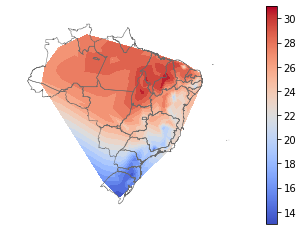

In [11]:
lons = temp_vals["lon"].to_numpy()[:]
lats = temp_vals["lat"].to_numpy()[:]
data = temp_vals["tair"].to_numpy()[:]

fig_tair = plt.figure()

ax = plt.axes(projection=ccrs.Miller())

lb = 13; ub = 31; lv = 20 # lower bound, upper bound, levels

plt.tricontourf(lons, lats, data, np.linspace(lb, ub, lv),
                cmap="coolwarm", extend="both")

gplt.polyplot(br, edgecolor="dimgray", linewidth=0.5, zorder=1, ax=ax)

plt.colorbar(ScalarMappable(norm=Normalize(lb, ub), cmap="coolwarm"), ax=ax)

plt.show()

fig_tair.savefig("tair_baseline.png", dpi=300)